In [1]:
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline


In [2]:
#import dataset
raw_data = pd.read_csv('/resources/data/311_Service_Requests_from_2010_to_Present.csv', low_memory = False)

In [3]:
raw_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

### Check for null data and treat nulls


In [5]:
raw_data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [6]:
#drop missing rows in closed date
new_raw_data = raw_data[raw_data['Closed Date'].notna()]
new_raw_data.shape

(298534, 53)

In [7]:
#drop columns with missing data
droped_columns = new_raw_data.dropna(axis= 1)

In [8]:
droped_columns.shape

(298534, 19)

In [9]:
droped_columns.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Status,Resolution Description,Community Board,Borough,Park Facility Name,Park Borough,School Name,School Number,School Phone Number,School Address,School City,School State,School Not Found
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Closed,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,Closed,The Police Department responded to the complai...,01 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,Closed,The Police Department responded and upon arriv...,07 BRONX,BRONX,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Closed,The Police Department responded to the complai...,10 BRONX,BRONX,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Closed,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N


In [10]:
data = droped_columns


In [11]:
#convert time from float to datetime
df = pd.DataFrame(data)
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [12]:
#verify datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 19 columns):
Unique Key                298534 non-null int64
Created Date              298534 non-null datetime64[ns]
Closed Date               298534 non-null datetime64[ns]
Agency                    298534 non-null object
Agency Name               298534 non-null object
Complaint Type            298534 non-null object
Status                    298534 non-null object
Resolution Description    298534 non-null object
Community Board           298534 non-null object
Borough                   298534 non-null object
Park Facility Name        298534 non-null object
Park Borough              298534 non-null object
School Name               298534 non-null object
School Number             298534 non-null object
School Phone Number       298534 non-null object
School Address            298534 non-null object
School City               298534 non-null object
School State              298534 non-null

In [13]:
df.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Agency Name               0
Complaint Type            0
Status                    0
Resolution Description    0
Community Board           0
Borough                   0
Park Facility Name        0
Park Borough              0
School Name               0
School Number             0
School Phone Number       0
School Address            0
School City               0
School State              0
School Not Found          0
dtype: int64

In [89]:
####Calculate closing time

In [14]:
#create a closing time column and calculate
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

In [15]:
#verify that the column has been created with proper datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 20 columns):
Unique Key                298534 non-null int64
Created Date              298534 non-null datetime64[ns]
Closed Date               298534 non-null datetime64[ns]
Agency                    298534 non-null object
Agency Name               298534 non-null object
Complaint Type            298534 non-null object
Status                    298534 non-null object
Resolution Description    298534 non-null object
Community Board           298534 non-null object
Borough                   298534 non-null object
Park Facility Name        298534 non-null object
Park Borough              298534 non-null object
School Name               298534 non-null object
School Number             298534 non-null object
School Phone Number       298534 non-null object
School Address            298534 non-null object
School City               298534 non-null object
School State              298534 non-null

# INSIGHTS FROM THE DATA

In [16]:
complaints_type = df.loc[:,'Complaint Type']



In [17]:
complaints_type.unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [18]:
#count the grouped complaint types
complaints_grouped = complaints_type.value_counts()
complaints_grouped

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [19]:
#Find the top 10 complaint types
top_10_complaints = complaints_grouped.head(10)
top_10_complaints

Blocked Driveway           76810
Illegal Parking            74532
Noise - Street/Sidewalk    48076
Noise - Commercial         35247
Derelict Vehicle           17588
Noise - Vehicle            17033
Animal Abuse                7768
Traffic                     4496
Homeless Encampment         4416
Noise - Park                4022
Name: Complaint Type, dtype: int64

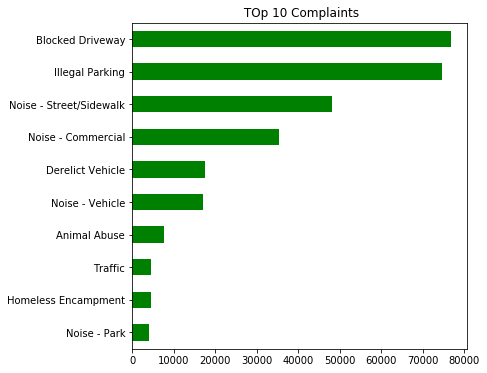

In [20]:
#plot the top 10
top_10_complaints.sort_values(axis=0, ascending= True).plot(kind= 'barh',title= ' TOp 10 Complaints',color = 'g',figsize=(6,6))

In [21]:
# Complaints by borough


In [22]:
borough = df.loc[:,'Borough']

# unique boroughs

borough.unique()



array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

In [23]:
borough_grouped = borough.value_counts()
borough_grouped

BROOKLYN         98295
QUEENS           80629
MANHATTAN        66109
BRONX            40697
STATEN ISLAND    12338
Unspecified        466
Name: Borough, dtype: int64

Text(0, 0.5, 'Number of complaints')

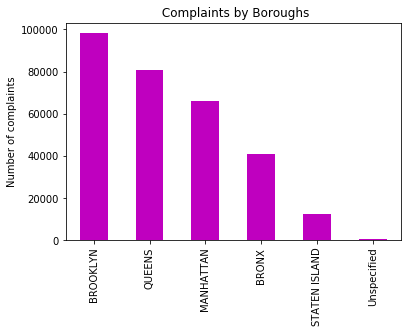

In [24]:
#plot the boroughs
borough_grouped.sort_values(axis= 0, ascending= False).plot(kind='bar',title= ' Complaints by Boroughs', color = "m")
plt.ylabel('Number of complaints')

In [25]:
#Complaints by Neighbourhood
location = df.loc[:,'Community Board']

#Unique Locations

location.unique()



array(['12 MANHATTAN', '01 QUEENS', '07 BRONX', '10 BRONX', '04 QUEENS',
       '07 BROOKLYN', '03 BRONX', '09 QUEENS', '11 BROOKLYN', '03 QUEENS',
       '05 BRONX', '05 BROOKLYN', '05 QUEENS', '06 QUEENS', '12 QUEENS',
       '06 BROOKLYN', '18 BROOKLYN', '10 MANHATTAN', '04 BRONX',
       '12 BRONX', '09 MANHATTAN', '10 QUEENS', '07 MANHATTAN',
       '02 BROOKLYN', '03 BROOKLYN', '11 BRONX', '0 Unspecified',
       '08 BROOKLYN', '01 BROOKLYN', '03 STATEN ISLAND', '06 MANHATTAN',
       '03 MANHATTAN', '10 BROOKLYN', '11 MANHATTAN', '07 QUEENS',
       '11 QUEENS', '17 BROOKLYN', '13 QUEENS', '06 BRONX',
       '04 MANHATTAN', '14 BROOKLYN', '12 BROOKLYN', '08 MANHATTAN',
       '13 BROOKLYN', '15 BROOKLYN', '01 STATEN ISLAND', '09 BRONX',
       '02 STATEN ISLAND', '02 QUEENS', '16 BROOKLYN', '08 QUEENS',
       '09 BROOKLYN', '04 BROOKLYN', '14 QUEENS', '05 MANHATTAN',
       '08 BRONX', '02 BRONX', '02 MANHATTAN', '01 BRONX', '01 MANHATTAN',
       '83 QUEENS', '95 STATEN ISLAND

In [26]:
location_grouped = location.value_counts()
location_grouped

12 MANHATTAN                 12386
01 BROOKLYN                  10919
05 QUEENS                     9420
01 QUEENS                     9196
09 QUEENS                     8010
18 BROOKLYN                   7553
07 QUEENS                     7447
12 BROOKLYN                   7217
12 QUEENS                     7188
03 BROOKLYN                   6981
10 MANHATTAN                  6700
03 MANHATTAN                  6532
11 BROOKLYN                   6231
03 QUEENS                     5987
05 BROOKLYN                   5772
10 QUEENS                     5679
15 BROOKLYN                   5664
10 BROOKLYN                   5442
05 MANHATTAN                  5353
14 BROOKLYN                   5341
12 BRONX                      5248
04 QUEENS                     5247
02 BROOKLYN                   5172
02 QUEENS                     5081
04 BRONX                      5046
13 QUEENS                     5032
01 STATEN ISLAND              5030
04 BROOKLYN                   4998
04 MANHATTAN        

In [27]:
top_locations = location_grouped.head(10)
top_locations

12 MANHATTAN    12386
01 BROOKLYN     10919
05 QUEENS        9420
01 QUEENS        9196
09 QUEENS        8010
18 BROOKLYN      7553
07 QUEENS        7447
12 BROOKLYN      7217
12 QUEENS        7188
03 BROOKLYN      6981
Name: Community Board, dtype: int64

Text(0, 0.5, 'Number of complaints')

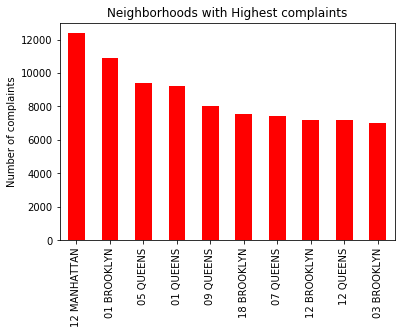

In [28]:
#plot the top neighbourhoods by complaints
top_locations.sort_values(axis = 0, ascending = False).plot(kind = 'bar', title = 'Neighborhoods with Highest complaints', color= 'r')
plt.ylabel('Number of complaints')

In [29]:
#Status of complaints
status = df.loc[:,'Status']

#Unique values
status.unique()

array(['Closed', 'Open', 'Draft', 'Assigned'], dtype=object)

In [30]:
status = status.value_counts()
status

Closed      298471
Open            36
Assigned        26
Draft            1
Name: Status, dtype: int64

In [31]:
#convert Request Closing time to seconds
df['seconds'] = df['Request_Closing_Time'].dt.total_seconds().astype(float)
df.head(4)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Status,Resolution Description,Community Board,Borough,...,Park Borough,School Name,School Number,School Phone Number,School Address,School City,School State,School Not Found,Request_Closing_Time,seconds
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Closed,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,...,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,00:55:15,3315.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,Closed,The Police Department responded to the complai...,01 QUEENS,QUEENS,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,01:26:16,5176.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,Closed,The Police Department responded and upon arriv...,07 BRONX,BRONX,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,04:51:31,17491.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Closed,The Police Department responded to the complai...,10 BRONX,BRONX,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,07:45:14,27914.0


In [32]:
#resolution time to minutes
df['Resolution_time_in_Mins'] = df['seconds']/60.0
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Status,Resolution Description,Community Board,Borough,...,School Name,School Number,School Phone Number,School Address,School City,School State,School Not Found,Request_Closing_Time,seconds,Resolution_time_in_Mins
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Closed,The Police Department responded and upon arriv...,12 MANHATTAN,MANHATTAN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,00:55:15,3315.0,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,Closed,The Police Department responded to the complai...,01 QUEENS,QUEENS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,01:26:16,5176.0,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,Closed,The Police Department responded and upon arriv...,07 BRONX,BRONX,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,04:51:31,17491.0,291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Closed,The Police Department responded to the complai...,10 BRONX,BRONX,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,07:45:14,27914.0,465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Closed,The Police Department responded and upon arriv...,04 QUEENS,QUEENS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,03:27:02,12422.0,207.033333


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 22 columns):
Unique Key                 298534 non-null int64
Created Date               298534 non-null datetime64[ns]
Closed Date                298534 non-null datetime64[ns]
Agency                     298534 non-null object
Agency Name                298534 non-null object
Complaint Type             298534 non-null object
Status                     298534 non-null object
Resolution Description     298534 non-null object
Community Board            298534 non-null object
Borough                    298534 non-null object
Park Facility Name         298534 non-null object
Park Borough               298534 non-null object
School Name                298534 non-null object
School Number              298534 non-null object
School Phone Number        298534 non-null object
School Address             298534 non-null object
School City                298534 non-null object
School State            

In [34]:
avg_time = df.groupby('Complaint Type').Resolution_time_in_Mins.mean().to_frame()
avg_time

,Resolution_time_in_Mins
Complaint Type,
Agency Issues,315.619444
Animal Abuse,312.794630
Animal in a Park,20210.083333
Bike/Roller/Skate Chronic,225.987736
Blocked Driveway,284.454311
Derelict Vehicle,441.848379
Disorderly Youth,213.515035
Drinking,231.709974
Graffiti,429.075074


In [35]:
avg_time.head()

,Resolution_time_in_Mins
Complaint Type,
Agency Issues,315.619444
Animal Abuse,312.794630
Animal in a Park,20210.083333
Bike/Roller/Skate Chronic,225.987736
Blocked Driveway,284.454311


In [36]:
avg_time.to_csv('/resources/data/new_file.csv', sep=" ", header=False, index=True)

In [39]:
from scipy import stats
from math import sqrt

#H0: All complain types average response time is similar
#H1: They are not similar

In [46]:
df['Complaint Type'].value_counts()

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [47]:
top5_complaints_type = df['Complaint Type'].value_counts()[:5]
top5_complaints_type

Blocked Driveway           76810
Illegal Parking            74532
Noise - Street/Sidewalk    48076
Noise - Commercial         35247
Derelict Vehicle           17588
Name: Complaint Type, dtype: int64

In [48]:
top5_complaints_type_names = top5_complaints_type.index
top5_complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [50]:
sample_data = df.loc[df['Complaint Type'].isin(top5_complaints_type_names),['Complaint Type','Resolution_time_in_Mins']]
sample_data.head()

,Complaint Type,Resolution_time_in_Mins
0,Noise - Street/Sidewalk,55.250000
1,Blocked Driveway,86.266667
2,Blocked Driveway,291.516667
3,Illegal Parking,465.233333
4,Illegal Parking,207.033333


In [52]:
sample_data.shape

(252253, 2)

In [53]:
sample_data.isnull().sum()

Complaint Type             0
Resolution_time_in_Mins    0
dtype: int64

In [54]:
s1=sample_data[sample_data['Complaint Type']==top5_complaints_type_names[0]].Resolution_time_in_Mins
s1.head()

1      86.266667
2     291.516667
7     107.916667
9      83.033333
10    468.033333
Name: Resolution_time_in_Mins, dtype: float64

In [55]:
s2=sample_data[sample_data['Complaint Type']==top5_complaints_type_names[1]].Resolution_time_in_Mins
s2.head()

3    465.233333
4    207.033333
5    113.500000
6    117.466667
8    513.033333
Name: Resolution_time_in_Mins, dtype: float64

In [57]:
s3=sample_data[sample_data['Complaint Type']==top5_complaints_type_names[2]].Resolution_time_in_Mins
s3.head()

0      55.250000
12    148.950000
19     47.083333
38     29.466667
54     89.733333
Name: Resolution_time_in_Mins, dtype: float64

In [58]:
s4=sample_data[sample_data['Complaint Type']==top5_complaints_type_names[3]].Resolution_time_in_Mins
s4.head()

17     51.133333
18    176.016667
22     75.700000
29    149.983333
30    119.150000
Name: Resolution_time_in_Mins, dtype: float64

In [59]:
s5=sample_data[sample_data['Complaint Type']==top5_complaints_type_names[4]].Resolution_time_in_Mins
s5.head()

14     629.383333
151    237.016667
255     81.883333
256    247.983333
295     45.200000
Name: Resolution_time_in_Mins, dtype: float64

In [62]:
stats.f_oneway(s1,s2,s3,s4,s5)

F_onewayResult(statistic=1799.6005241537619, pvalue=0.0)

P value is less than 0.05 so we reject H0 and accept H1

Are the type of complaint or service requested and location related?

####H0 : 2 categories - Complain Type and Location is independent means not related
####H1 : 2 categories - Complain Type and Location is dependent means related

In [81]:
top5_location = df['Borough'].value_counts()[:5]
top5_location

BROOKLYN         98295
QUEENS           80629
MANHATTAN        66109
BRONX            40697
STATEN ISLAND    12338
Name: Borough, dtype: int64

In [83]:
top5_locations_names = top5_location.index
top5_locations_names

Index(['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'], dtype='object')

In [84]:
sample_data_location_c_type = df.loc[(df['Complaint Type'].isin(top5_complaints_type_names)) & (df['Borough'].isin(top5_locations_names)),['Complaint Type', 'Borough']]
sample_data_location_c_type.head()

,Complaint Type,Borough
0,Noise - Street/Sidewalk,MANHATTAN
1,Blocked Driveway,QUEENS
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,QUEENS


In [85]:
pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['Borough'], margins=True)

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12754,28147,2071,31639,2142,76753
Derelict Vehicle,1952,5179,537,8108,1766,17542
Illegal Parking,7859,27461,12129,21979,4886,74314
Noise - Commercial,2433,11458,14554,6073,678,35196
Noise - Street/Sidewalk,8889,13353,20543,4407,817,48009
All,33887,85598,49834,72206,10289,251814


In [86]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['Borough']))

In [88]:
print(ch2)
print(p_value)

57642.03421472608
0.0
